<a href="https://colab.research.google.com/github/Robert-Gomez-AI/HeartFailure/blob/main/M2U3_fase_2_Entendimiento_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://drive.google.com/uc?export=view&id=10DJdk95gzrY6H-dKEFKshN814gdMc9FV" alt = "Encabezado MLDS" width = "100%">  </img>

# **Entendimiento y Preparación de los Datos**
---

Este notebook es una plantilla que le puede servir como guía para el segundo entregable del proyecto aplicado.

## **0. Integrantes del equipo de trabajo**
---

Por favor incluya los nombres completos y número de identificación de los integrantes del equipo de trabajo:

1. John Robert Gomez Pachón
2. Yojhan Leandro Roldan Robles
3. Daniela Mejia Castro

In [52]:
#Cargue de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
#Carga de datos desde GitHub
df=pd.read_csv('https://raw.githubusercontent.com/Robert-Gomez-AI/HeartFailure/main/Data/heart_failure_clinical_records_dataset.csv')

In [28]:
#Función para identificar variables numericas y categoricas del dataset
'''
Dado que todas las variables se representan numericamente, pero que las variables categoricas se muestran con un comportamiento
booleano (0,1), vamos a separar las variables con tal criterio usando la siguiente función
'''
def identificar_dtypes(df):
  '''
  Esta función detecta las variables consideradas como categoricas y cuantitativas en este set especifico
  La función retorna dos listas, cada una agrupando las variables del dataframe
  La función solo identifica las variables categoricas para este tipo de dataset en el cual solo tienen dos valores: [0,1]
  '''
  variables_categoricas=[]
  variables_cuantitativas=[]
  for col in df.columns:
    if set(df[col].unique())==set([0,1]):
      variables_categoricas.append(col)
    elif pd.api.types.is_numeric_dtype(df[col]):
      variables_cuantitativas.append(col)
    else:
      print(f'La variable {col} no ha sido identificada')
  return variables_categoricas,variables_cuantitativas

variables_categoricas,variables_cuantitativas = identificar_dtypes(df)

## **1. Análisis Exploratorio de los Datos**
---

Normalmente en el análisis exploratorio, se trata de dar respuesta a los siguientes elementos:

### **1.1. Resumen General**
---

- ¿Cuántos documentos tiene el *dataset*?

**El dataset contiene un total de 299 registros con 12 variables, dando un total de 3887 datos.**

- ¿En qué formato están almacenados los datos?

**Los datos se encuentran almacenados en un archivo tipo csv separado por comas (commas separated values).**

- ¿Qué tamaño en MB tiene el conjunto de datos?

**El conjunto de datos tiene un peso de 0.011672019958496094 MB, el dataframe que lo contiene tiene un peso de 0.02977752685546875 MB.**


In [5]:
#Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
#Ejemplos aleatorios del dataframe
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
151,62.000,0,30,1,60,1,244000.00,0.90,139,1,0,117,0
185,60.667,1,104,1,30,0,389000.00,1.50,136,1,0,171,1
212,78.000,0,224,0,50,0,481000.00,1.40,138,1,1,192,0
22,68.000,1,220,0,35,1,289000.00,0.90,140,1,1,20,1
81,67.000,0,582,0,50,0,263358.03,1.18,137,1,1,76,0


In [13]:
#Dimensiones y tamaño del archivo
print(f'El set de datos contiene {df.shape[0]} registros con {df.shape[1]} variables.\nEl conjunto contiene un total de {df.size} datos.\n')
tamaño_archivo=os.path.getsize('heart_failure_clinical_records_dataset.csv')/ (1024 ** 2)
print(f'El archivo cargado pesa un total de {tamaño_archivo} MB.\nEl espacio en memoria del dataframe es de {df.memory_usage().sum()/(1024**2)} MB')

El set de datos contiene 299 registros con 13 variables.
El conjunto contiene un total de 3887 datos.

El archivo cargado pesa un total de 0.011672019958496094 MB.
El espacio en memoria del dataframe es de 0.02977752685546875 MB


### **1.2. Resumen de la Calidad de los datos**
---

- ¿Se detecta la ausencia de datos, la presencia de documentos vacíos o la existencia de datos de baja calidad en el conjunto?

**Se observa un conjunto de datos muy limpio con ausencia de datos faltantes o corruptos.**
- ¿Se identifican documentos ilegibles o con dificultades de codificación durante la revisión del conjunto de datos?

**No se encontraron documentos ilegibles ni dificultades en la lectura, el conjunto tiene la facilidad de encontrar todos sus datos en formato numerico lo que evita valores variados en variables categoricas o desviaciones en la escritura de las variables.**
- ¿Se observa una diversidad de formatos en el conjunto de datos que pueda dificultar su consistencia o comprensión?

**No se encuentra diversidad en formatos, pero si se evidencia que los datos categoricos no estan balanceados al igual que la variable predecir, del mismo modo se encuentra que los datos numericos NO tienen una distribución normal (se realizó una prueba de normalidad de shapiro e histogramas)**
- ¿Se identificaron y abordaron posibles problemas, como valores atípicos, duplicados o datos faltantes?

**Ninguno problema de datos faltantes, duplicados o corruptos, sin embargo encontramos ciertas variables con datos atipicos, pero consideramos que estas pueden jugar un papel fundamental en la predicción de DEATH_EVENT ya que pueden contener información de relevancia para la variable de estudio, adicionalmente los datos no son normales por lo que su distribución permita este tipo de datos.**

In [27]:
#Formatos de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [54]:
# Identificar valores duplicados
duplicates = df[df.duplicated()]

# Imprimir la cantidad de valores duplicados
print("Cantidad de Valores Duplicados:", len(duplicates))

Cantidad de Valores Duplicados: 0


Valores faltantes por variable:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


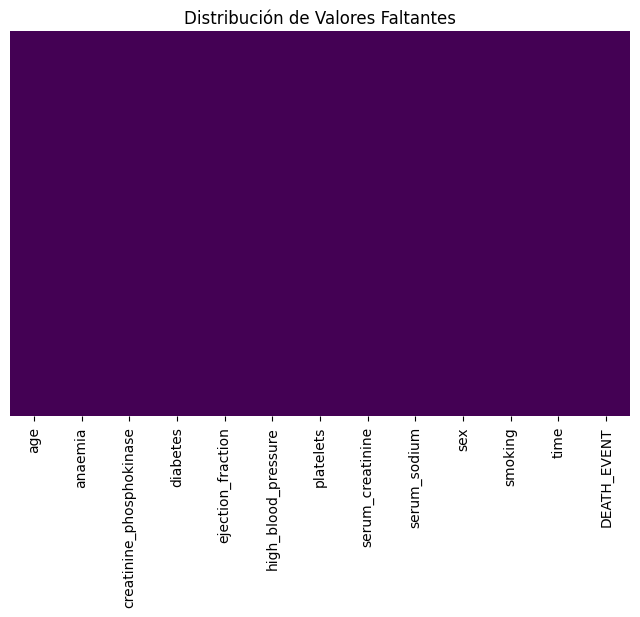

In [25]:
# Identificar valores faltantes
missing_values = df.isnull().sum()

# Imprimir la cantidad de valores faltantes por variable
print("Valores faltantes por variable:")
print(missing_values)

# Análisis de la distribución de valores faltantes
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Distribución de Valores Faltantes')
plt.show()

**Graficas de caja y medidas de posición y tendencia central**

In [42]:
#Medidas de dispersión y tendencia central
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


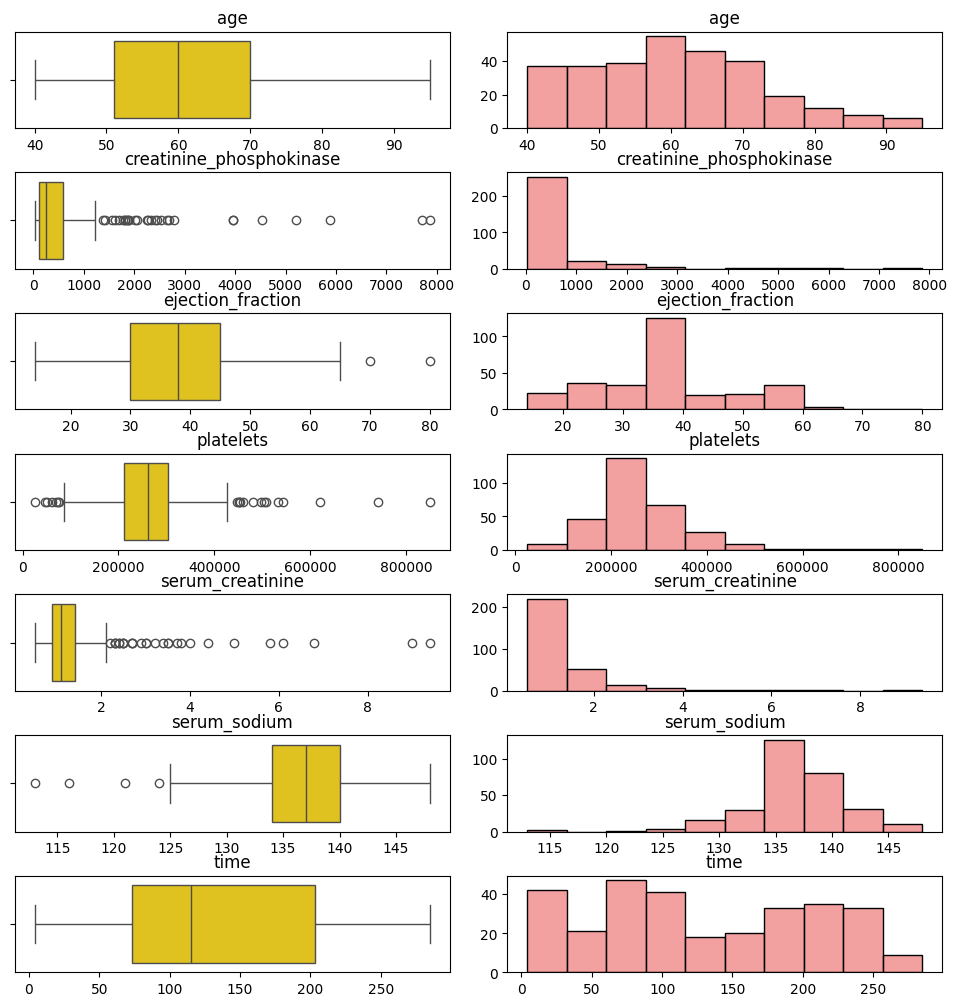

In [41]:
#Boxplots para identificar outliers
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10,10))
fig.subplots_adjust(hspace=0.5)
fig.tight_layout()
for i, col in enumerate(variables_cuantitativas):
    sns.boxplot(x=col, data=df, ax=ax[i,0],color='gold')
    ax[i,0].set_title(col)
    ax[i,0].set_xlabel('')
for i, columna in enumerate(variables_cuantitativas):
    sns.histplot(df[columna], bins=10, kde=False, ax=ax[i][1],color='lightcoral')
    ax[i][1].set_title(columna)
    ax[i,1].set_xlabel('')
    ax[i,1].set_ylabel('')


**Pruebas de normalidad para variables cuantitativas**

In [53]:
#Pruebas de normalidad (para definir el coeficiente de correlación más adecuado)
'''
Se realiza la prueba de normalidad de shapiro para determinar que coeficiente de correlación se utiliza
'''
v_normales=[]
v_no_normales=[]
for col in variables_cuantitativas:
  if stats.shapiro(df[col]).pvalue < 0.05:
    v_no_normales.append(col)
    print(f'La variable {col} NO es normal con un pvalor de {stats.shapiro(df[col]).pvalue}')
  else:
    v_normales.append(col)
    print(f'La variable {col} SI es normal con un pvalor de {stats.shapiro(df[col]).pvalue}')

La variable age NO es normal con un pvalor de 5.3476593166124076e-05
La variable creatinine_phosphokinase NO es normal con un pvalor de 7.05055700731454e-28
La variable ejection_fraction NO es normal con un pvalor de 7.215172015406779e-09
La variable platelets NO es normal con un pvalor de 2.8836867789483467e-12
La variable serum_creatinine NO es normal con un pvalor de 5.3927583038658e-27
La variable serum_sodium NO es normal con un pvalor de 9.220169072676754e-10
La variable time NO es normal con un pvalor de 6.284944120693581e-09


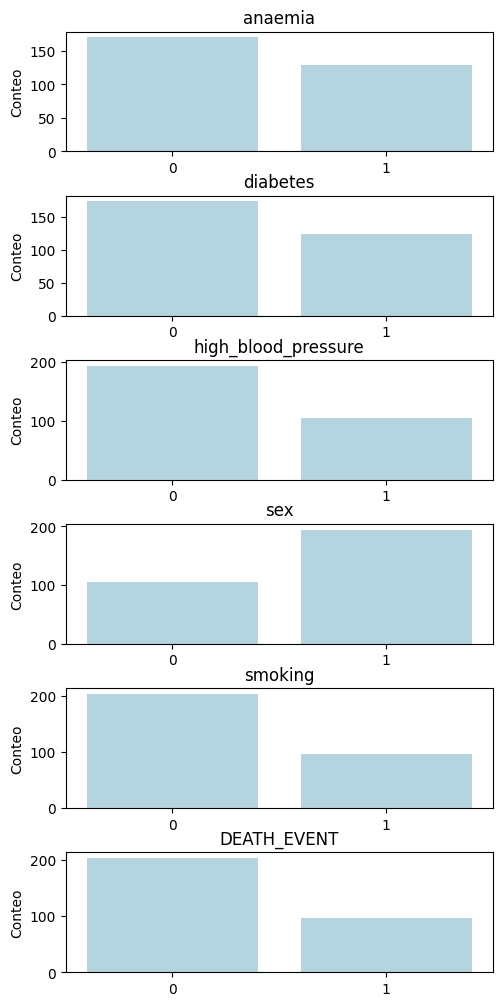

In [51]:
#Graficos de barras para variables categoricas
fig, ax = plt.subplots(nrows=len(variables_categoricas), ncols=1, figsize=(5,10))
fig.subplots_adjust(hspace=0.3)
fig.tight_layout()

for i,col in enumerate(variables_categoricas):
  sns.countplot(x=df[col],ax=ax[i],color='lightblue')
  ax[i].set_title(col)
  ax[i].set_ylabel('Conteo')
  ax[i].set_xlabel('')

### **1.3. Tipos de variables**
---

- ¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?

**Si, la variable DEATH_EVENT es el objeto de estudio del dataframe y consiste en una variable categorica de booleana que dicta si el paciente sobrevive o no a la falla cardiaca de la cual padece.**

- Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.

**Efectivamente los datos no estan balanceados para la variable DEATH_EVENT, ya que se cuenta con más datos de eventos de no muerte con una relación de 2 a 1.**
- ¿El conjunto de datos cuenta con otras variables adicionales?, de ser así, debe analizar cuáles se incorporarán en el modelo y hacer un análisis descriptivo de las mismas.

**El conjunto cuenta con 11 variables que se componen de datos de los pacientes obtenidos durante su observación: si sufria otras enfermedades relacionadas como la diabetes, el tiempo de observación, presion arterial, si era fumador activo, entre otras.**

In [6]:
#Función para identificar variables numericas y categoricas del dataset
'''
Dado que todas las variables se representan numericamente, pero que las variables categoricas se muestran con un comportamiento
booleano (0,1), vamos a separar las variables con tal criterio usando la siguiente función
'''
def identificar_dtypes(df):
  '''
  Esta función detecta las variables consideradas como categoricas y cuantitativas en este set especifico
  La función retorna dos listas, cada una agrupando las variables del dataframe
  La función solo identifica las variables categoricas para este tipo de dataset en el cual solo tienen dos valores: [0,1]
  '''
  variables_categoricas=[]
  variables_cuantitativas=[]
  for col in df.columns:
    if set(df[col].unique())==set([0,1]):
      variables_categoricas.append(col)
    elif pd.api.types.is_numeric_dtype(df[col]):
      variables_cuantitativas.append(col)
    else:
      print(f'La variable {col} no ha sido identificada')
  return variables_categoricas,variables_cuantitativas

variables_categoricas,variables_cuantitativas = identificar_dtypes(df)
print(f'Variables categoricas: {variables_categoricas}\n')
print(f'Variables numericas: {variables_cuantitativas}')

Variables categoricas: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

Variables numericas: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


Text(0, 0.5, 'Conteo')

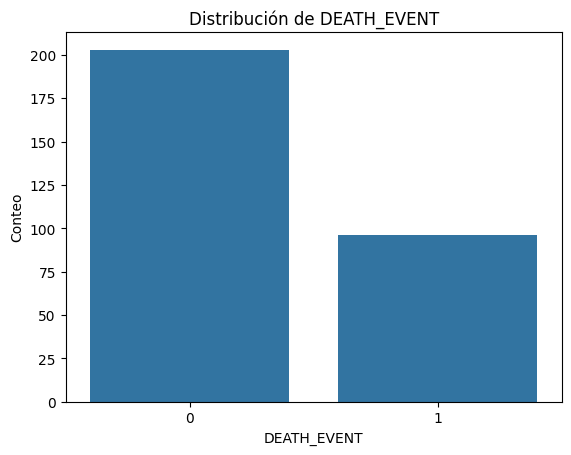

In [23]:
#Distribución de la variable DEATH_EVENT
ax=sns.countplot(x=df['DEATH_EVENT'])
ax.set_title('Distribución de DEATH_EVENT')
ax.set_ylabel('Conteo')

**Características del conjunto de datos sobre pacientes con insuficiencia cardíaca**

La tabla presenta las distintas características del conjunto de datos que se enfoca en pacientes que han experimentado insuficiencia cardíaca. Dichas características incluyen información demográfica como la edad y el sexo, así como medidas médicas como el peso, la altura, la presión arterial, niveles de hemoglobina, entre otros. Las variables se clasifican en numéricas y binarias:

| Característica | Descripción | Tipo |
|---|---|---|
| Edad | Edad del paciente en años | Numérica |
| Sexo | Sexo del paciente (hombre/mujer) | Binaria |
| Peso | Peso del paciente en kilogramos | Numérica |
| Altura | Altura del paciente en metros | Numérica |
| Hemoglobina | Nivel de hemoglobina en la sangre (g/dL) | Numérica |
| Presión arterial | Presión arterial sistólica/diastólica (mmHg) | Numérica |
| Diabetes | ¿Tiene diabetes el paciente? (sí/no) | Binaria |
| Tabaquismo | ¿Fuma el paciente? (sí/no) | Binaria |
| Anemia | ¿Tiene anemia el paciente? (sí/no) | Binaria |
| CPK | Nivel de la enzima CPK en la sangre (U/L) | Numérica |
| EF | Eficiencia cardíaca (%) | Numérica |
| Creatinina sérica | Nivel de creatinina en la sangre (mg/dL) | Numérica |
| Sodio sérico | Nivel de sodio en la sangre (mEq/L) | Numérica |
| Evento de muerte | ¿El paciente murió durante el seguimiento? (sí/no) | Binaria |


### **1.4. Relación Entre Variables**
---

- Analice si existe alguna relación entre las variables. Puede utilizar medidas de correlación o visualizaciones.

**Se encuentran correlaciones bajas pero si existe relación en las variables teniendo en cuenta el p-value de las relaciones, consideramos que las variables con mayor relación a la variable de estudio son: serum_creatinine, age y creatinine_phosphokinase.**
- Identifique si hay redundancia entre las variables para una posterior eliminación o selección.

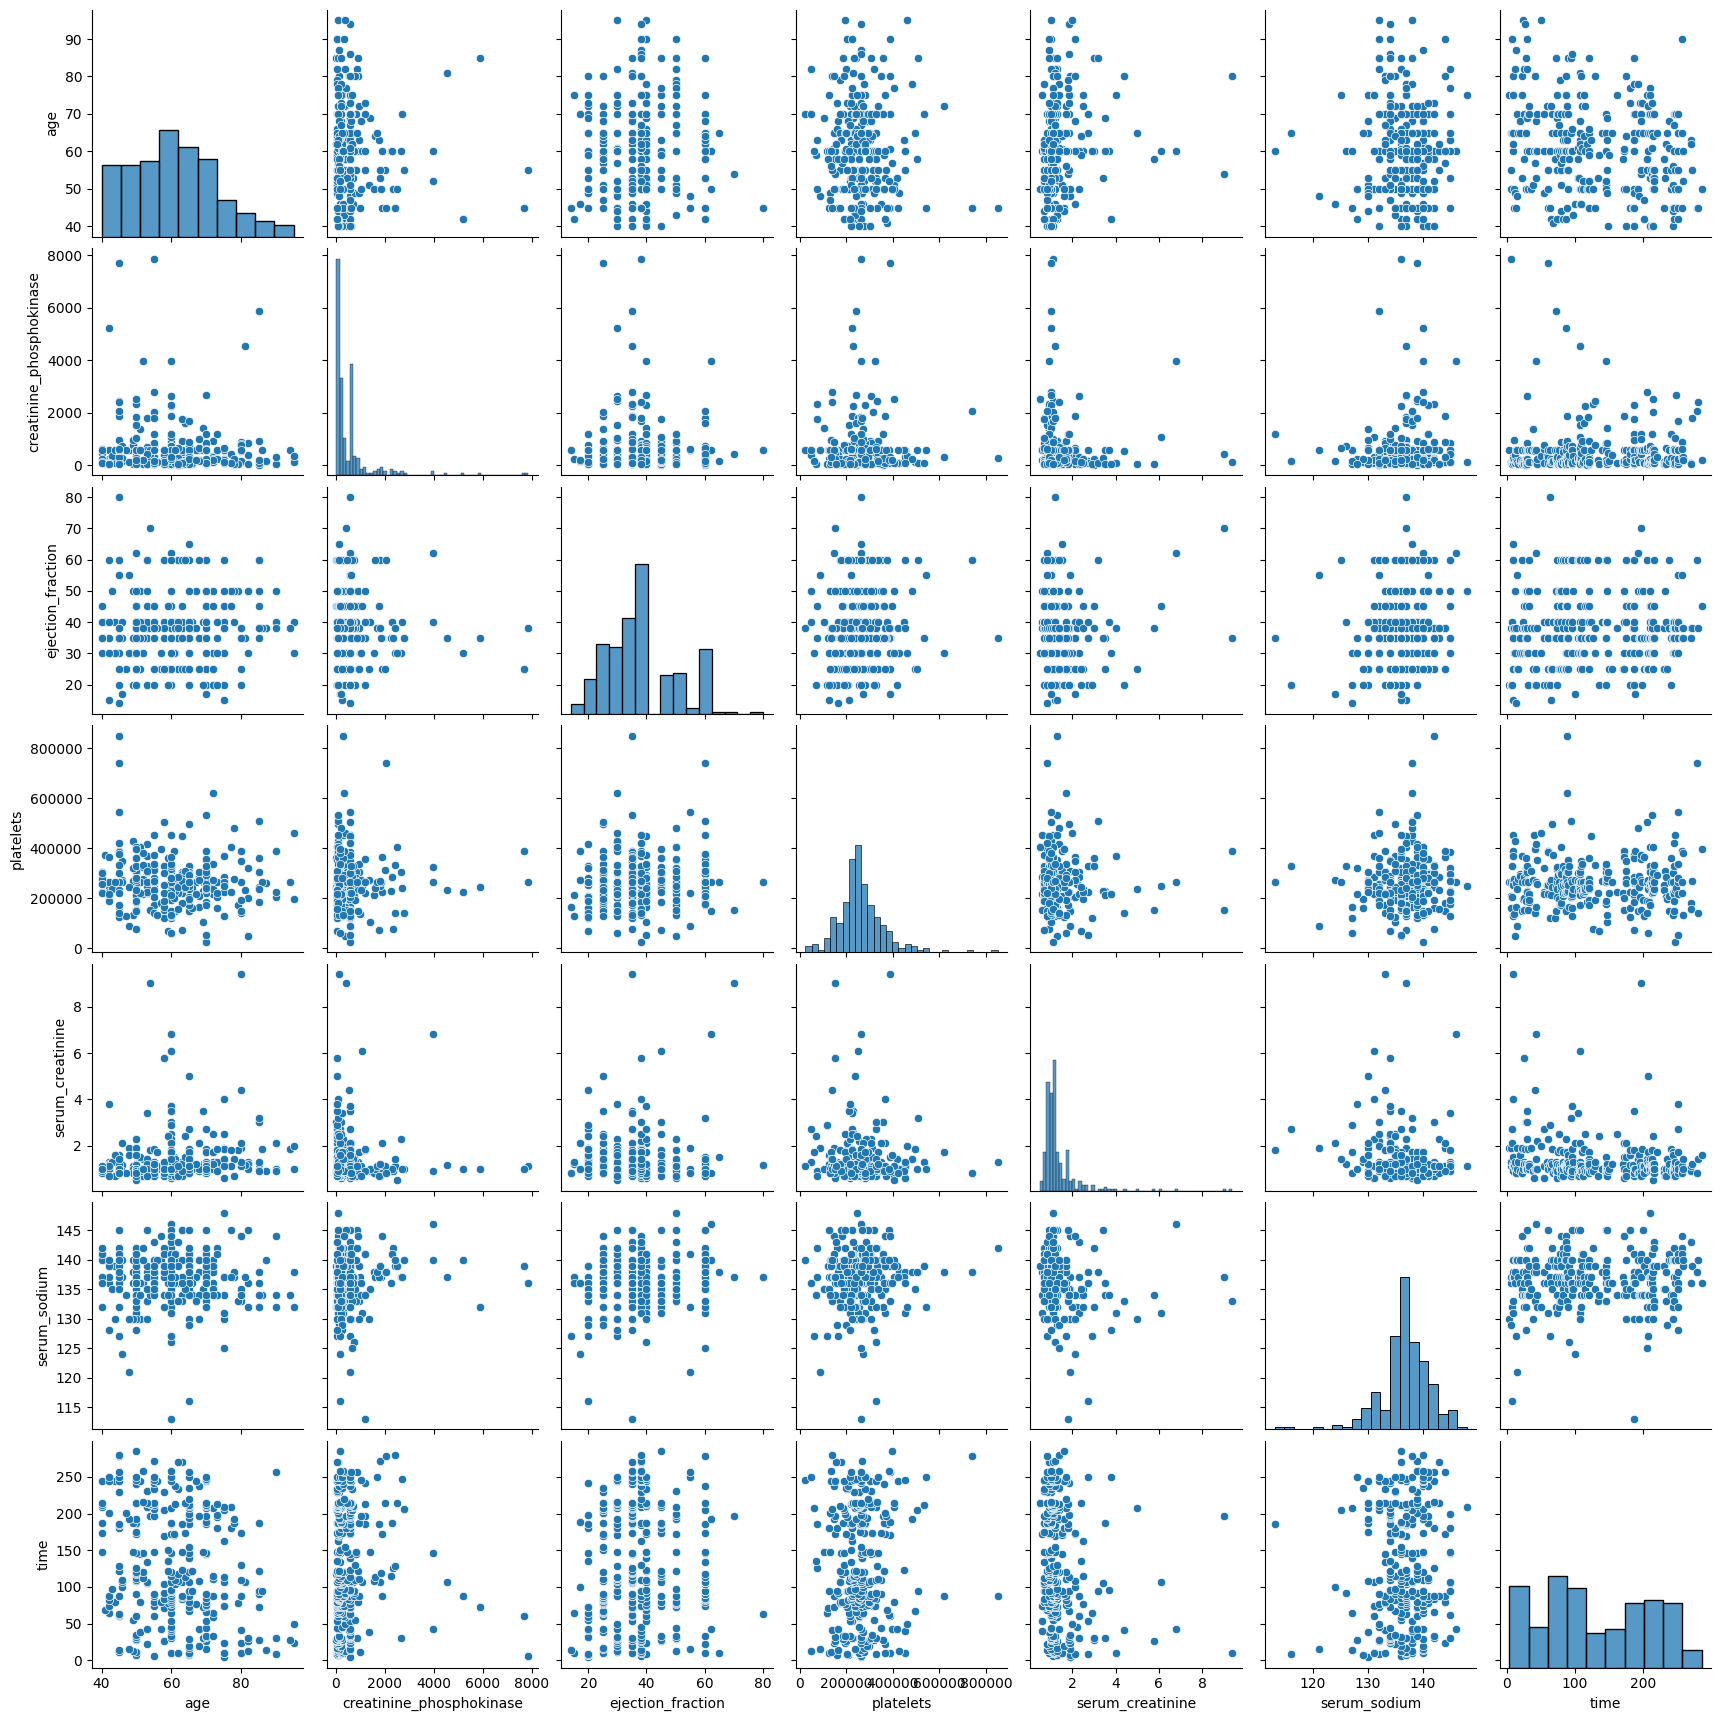

In [55]:
sns.pairplot(df[variables_cuantitativas])

Text(0.5, 1.0, 'Correlación de Spearman para variables cuantitativas')

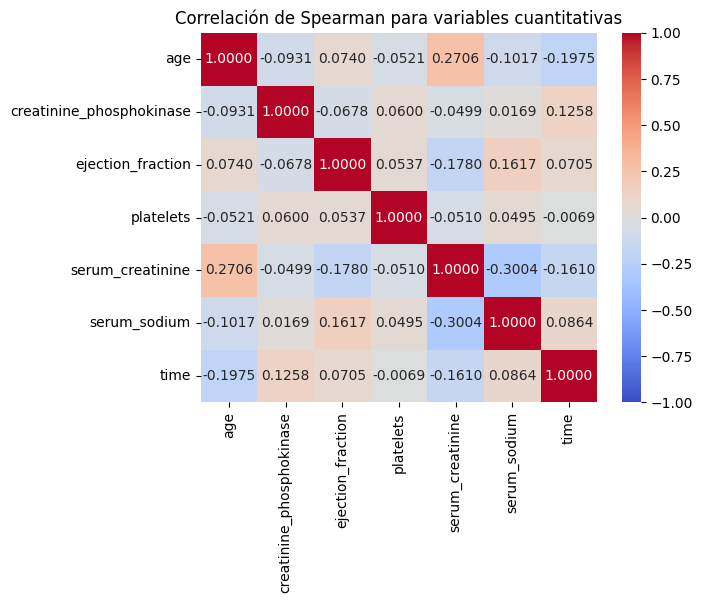

In [57]:
# Correlación entre variables cuantitativas
'''
Se utiliza el metodo de Spearman ya que no se supone Normalidad en las variables
'''
ax=sns.heatmap(df[variables_cuantitativas].corr(method='spearman'),cmap='coolwarm',vmin=-1,vmax=1, annot=True,fmt='.4f')
ax.set_title('Correlación de Spearman para variables cuantitativas')

Text(0.5, 80.5815972222222, 'Variables Cuantitativas')

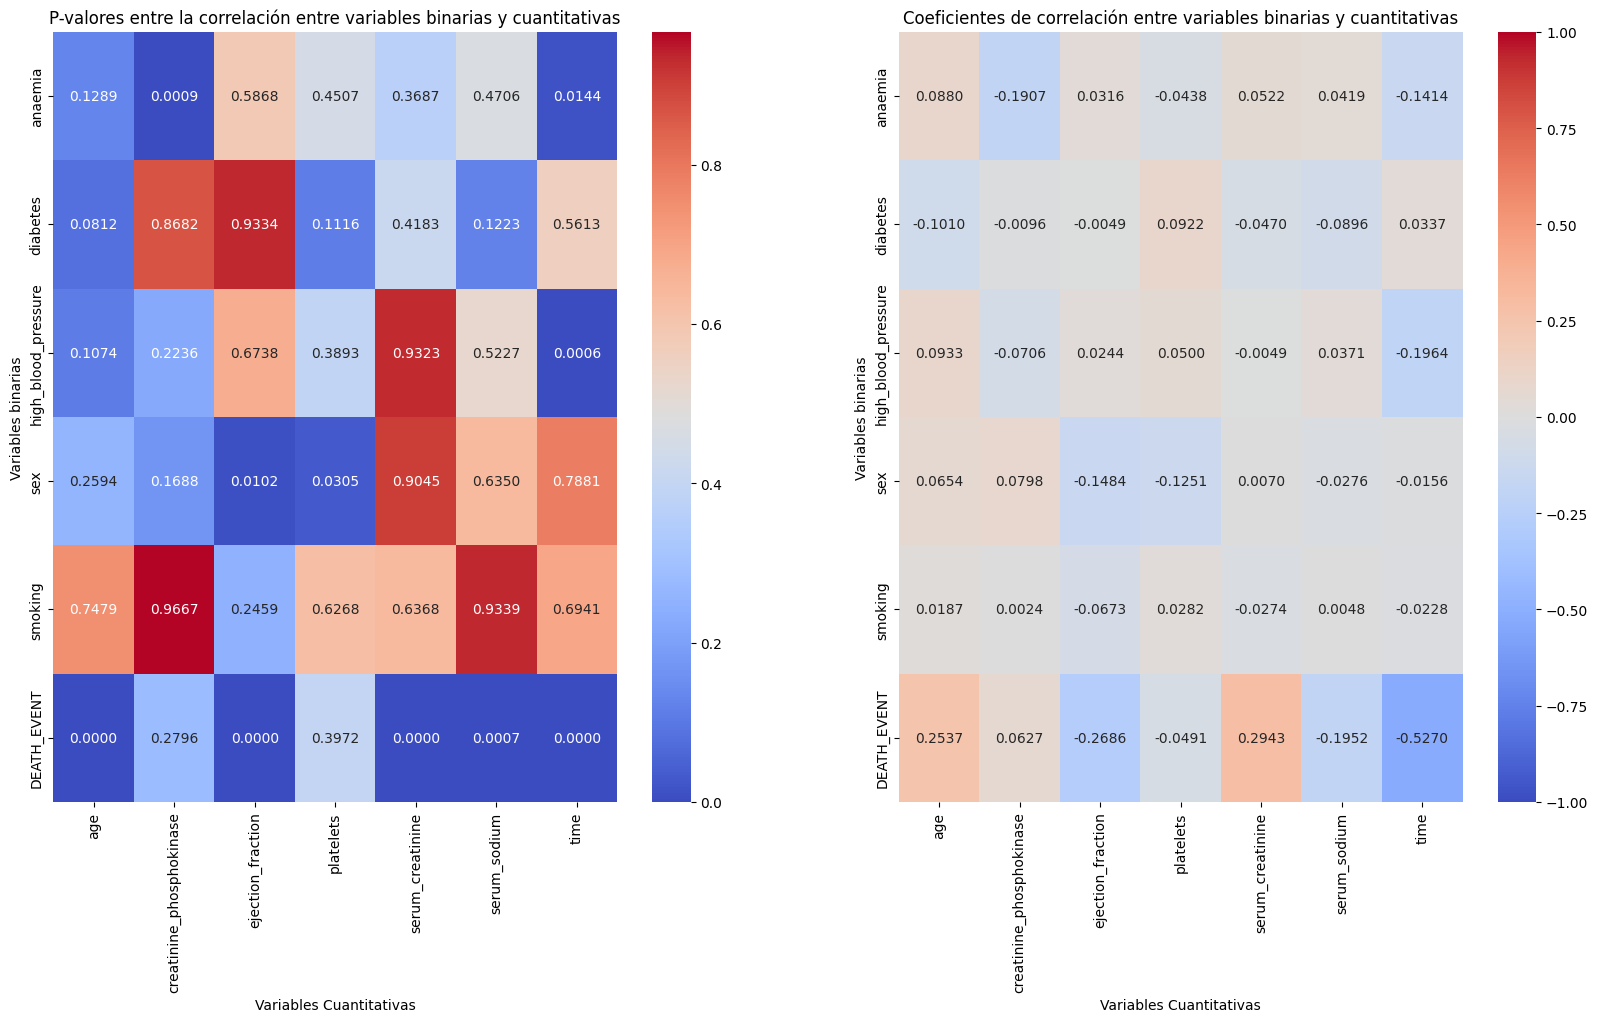

In [58]:
from scipy.stats import pointbiserialr
'''
Se utiliza la correlación de punto biserial por la naturaleza de las variables
'''
v_cat,v_cuan=identificar_dtypes(df)
#Encontrar correlaciones y pvalores
p_values=np.zeros([len(v_cat),len(v_cuan)])
coef_corr_biserial=np.zeros([len(v_cat),len(v_cuan)])
for i,col_cat in enumerate(v_cat):
  for j,col_cuan in enumerate(v_cuan):
    coef_corr_biserial_num, p_value = pointbiserialr(df[col_cat], df[col_cuan])
    coef_corr_biserial[i][j]=coef_corr_biserial_num
    p_values[i][j]=p_value
df_pvalues=pd.DataFrame(p_values,index=v_cat,columns=v_cuan)
correlaciones_biserial=pd.DataFrame(coef_corr_biserial,index=v_cat,columns=v_cuan)

#Graficar correlaciones y pvalores
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))

sns.heatmap(df_pvalues,cmap='coolwarm',vmin=0, annot=True,fmt='.4f',ax=ax[0])
ax[0].set_title('P-valores entre la correlación entre variables binarias y cuantitativas')
ax[0].set_ylabel('Variables binarias')
ax[0].set_xlabel('Variables Cuantitativas')

sns.heatmap(correlaciones_biserial,cmap='coolwarm',vmin=-1,vmax=1, annot=True,fmt='.4f',ax=ax[1])
ax[1].set_title('Coeficientes de correlación entre variables binarias y cuantitativas')
ax[1].set_ylabel('Variables binarias')
ax[1].set_xlabel('Variables Cuantitativas')

## **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistente docente :**
  * [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*